In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


[[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
  [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
  [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
  ...
  [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
  [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
  [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]

 [[0.59607846 0.60784316 0.61960787 ... 0.4627451  0.4509804  0.44313726]
  [0.60784316 0.61960787 0.6313726  ... 0.4745098  0.4627451  0.4509804 ]
  [0.6156863  0.627451   0.6431373  ... 0.4862745  0.4745098  0.4627451 ]
  ...
  [0.50980395 0.5176471  0.5254902  ... 0.40392157 0.39607844 0.3882353 ]
  [0.5019608  0.50980395 0.5176471  ... 0.4        0.39215687 0.38431373]
  [0.49411765 0.5058824  0.50980395 ... 0.3882353  0.38039216 0.37254903]]

 [[0.5882353  0.6039216  0.61960787 ... 0.53333336 0.5137255  0.5019608 ]
  [0.5921569  0.611764

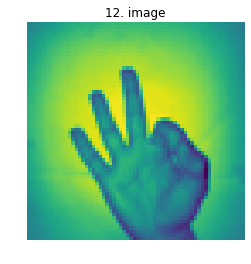

In [2]:
#load dataset
#dataset overview
#Now  we have 2 numpy files X.npy and Y.npy. So we need to load them.

dataset1=np.load('X.npy')
print(dataset1)

dataset2=np.load('Y.npy')
print(dataset2)
#Determine to variables
imageSize=64
#We can shown as in the figure.For example we want to see what is in the 12. data. 
#If you run it, you can see "3" digit data with the fingers of hand in the 12. data.
plt.imshow(dataset1[12].reshape(imageSize,imageSize))
plt.title("12. image")
#Now, we do not want to see the with axises.(Optional)
plt.axis("off")
#Now if we see the X.npy and Y.npy dataset. X.npy dataset (2062,64,64), Y.npy dataset is (2062,10).
#For 0: [0:204]
#For 1: [204:409]
#For 2:[409:615]
#♣For 3:[615:822]
#◘For 4:[822:1028]
#For 5: [1028:1236]
#For 6:[1236:1443]
#For 7:[1443:1649]
#For 8:[1649:1855]
#For 9[1855:2062]
#dataset2=dataset2.reshape(2062,1)
print("Dimension of Dataset1:" + str(dataset1.ndim))
print("Dataset1 shape:" +str( dataset1.shape))
print("Dataset2 shape:"+ str(dataset2.shape))

In [3]:
#Train and Test Split
#training and testing data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest=train_test_split(dataset1,dataset2, test_size=0.15, random_state=42)
trainNumber=Xtrain.shape[0]
testNumber=Ytest.shape[0]
trainNumber2=Ytrain.shape[0]
testNumber2=Xtest.shape[0]
print("Xtrain Number: " + str(trainNumber) + "Xtrain shape: " + str(Xtrain.shape))
print("Ytest Number:" + str(testNumber) + "Ytest shape: " + str(Ytest.shape))
print("Ytrain Number:" + str(trainNumber2) + "Ytrain shape: " + str(Ytrain.shape))
print("Xtest Number:" + str(testNumber2) + "Xtest shape: " + str(Xtest.shape))


Xtrain Number: 1752Xtrain shape: (1752, 64, 64)
Ytest Number:310Ytest shape: (310, 10)
Ytrain Number:1752Ytrain shape: (1752, 10)
Xtest Number:310Xtest shape: (310, 64, 64)


In [4]:
#Normalizationing Data; convert to gray scale: between 0 and 1
print("Normalization")
Xtrain=Xtrain/255.0
Xtest=Xtest/255.0
Ytrain=Ytrain/255.0
Ytest=Ytest/255.0
#Reshape Data because of the Keras rules
#-1?
Xtrain=Xtrain.reshape(-1,64,64,1)
Xtest=Xtest.reshape(-1,64,64,1)
#Ytrain=Ytrain.reshape(-1,10,1)
print("Xtrain shape: " , Xtrain.shape)
print("Xtest shape: ",Xtest.shape)
print("Ytest shape: ",Ytest.shape)
#Label Encoding
from keras.utils.np_utils import to_categorical
#Ytrain=to_categorical(Ytrain,num_classes=10)


Normalization
Xtrain shape:  (1752, 64, 64, 1)
Xtest shape:  (310, 64, 64, 1)
Ytest shape:  (310, 10)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
**********************
1752
(1752, 64, 64, 1)
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1752/1752 [==============================] - 81s 46ms/step - loss: 0.0090 - acc: 0.0974 - val_loss: 0.0090 - val_acc: 0.0774 0.0090 - acc: 0.103 - ETA: 1:30 - loss: 0.0090 - acc - ETA: 1:28 - loss: 0.0090 - acc: 0.10 - ETA: 1:28 - loss: 0.0090 - acc: 0 - ETA: 1:26 - loss: 0 - ETA: 1:21 - loss:  - ETA: 1:17 - loss: 0.0090 - ac - ETA: 1:16 - loss: 0.0090 - acc: 0 - ETA: 1: - ETA:  - ETA: 8s - lo
Epoch 2/5
1752/1752 [==============================] - 86s 49ms/step - loss: 0.0090 - acc: 0.0969 - val_loss: 0.0090 - val_acc: 0.0774: 0.0090 - acc:  - ETA: 17s - loss: 0.0090 - - ETA: 17s - loss: 0.0090 - a - ETA: 17s - loss: 0.0090 - - ETA: 17s - loss: 0.0090 - acc - ETA: 17s - loss: 0.0090 - acc - ETA: 16s 

1752/1752 [==============================] - 93s 53ms/step - loss: 0.0090 - acc: 0.1009 - val_loss: 0.0090 - val_acc: 0.0774ETA: 1:45 - loss: 0.0090 - acc: - ETA: 1:41 - loss: 0.009 - ETA: 1:43 - loss: 0.0090 - a - ETA: 1:42 - loss: 0.0090 - acc: 0.1 - ETA: 1:40 - loss: 0.0090 - acc: 0.09 - ETA: 1:41 - loss: 0.0090 - acc: 0.110 - ETA: 1:41 - loss: 0.00 - ETA: 1:37 - loss: 0.0090 - acc:  - ETA: 1:36 - loss: 0.0090 -  - ETA: 1:35 - loss: 0.0090 - acc: 0.1 - ETA: 1: - ETA: 1:31 - loss: 0.0090 - acc: 0.1 - ETA: 1:31 - loss: 0.0090 - acc: 0.11 - ETA: 1:31 - loss: 0.0090 - acc: 0.118 - ETA: 1:31 - loss:  - ETA: 1:29 - loss: 0.0090 - acc: 0.116 - ETA: 1:29 - loss: 0.0090  - ETA: 1:27 - loss: 0.0090 - acc: 0.120 - ETA: 1:27 - loss: 0.0090 - acc: 0 - ETA: 1:26 - loss: 0.0090 - acc: 0.12 - ETA: 1:26 - loss: 0.0090 - acc: 0.127 - ETA: 1:26 - loss: 0.0090 - - ETA: 1:26 - loss: 0.0090 -  - ETA: 1:25 - loss: 0.0090 - acc: 0. - ETA: 1:25 - loss: 0.0090 - acc: 0.124 - ETA: 1:25 - loss: 0.0090 - - ETA:

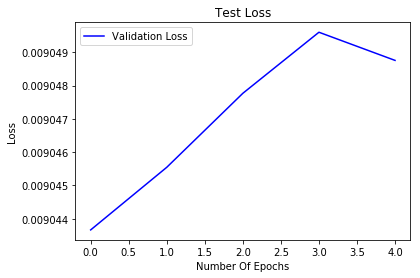

In [5]:
#Create a model

learningModel=Sequential()
#CNN-Same Padding
learningModel.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation='relu',input_shape=(64,64,1)))
#CNN-Max Pooling
learningModel.add(MaxPool2D(pool_size=(2,2)))
#Flattening
learningModel.add(Dropout(0.25))
#CNN-Same Padding2
learningModel.add(Conv2D(filters=2,kernel_size=(3,3),padding="Same", activation="relu"))
#CNN-Max Pooling2
learningModel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#Flattening2
learningModel.add(Dropout(0.25))
#Full Connection
learningModel.add(Flatten())
learningModel.add(Dense(256,activation="relu"))
learningModel.add(Dropout(0.5))
learningModel.add(Dense(10,activation="softmax"))
#Define Optimizer
learningOptimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#Compile Model
learningModel.compile(optimizer=learningOptimizer,loss="categorical_crossentropy",metrics=["accuracy"])
#Epochs and Batch Size
epoch=5
batchSize=5
#Data Augmentation
dataGeneration=ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                                  featurewise_std_normalization=False, samplewise_std_normalization=False,
                                  zca_whitening=False,rotation_range=0.5,zoom_range=0.5,width_shift_range=0.5,
                                  height_shift_range=0.5,horizontal_flip=False,vertical_flip=False)
dataGeneration.fit(Xtrain)

print("**********************")
print(len(Xtrain))
print(Xtrain.shape)

#Fit the Model
"""history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)
"""
modelProcess=learningModel.fit_generator(dataGeneration.flow(Xtrain,Ytrain,batch_size=batchSize),
                                         epochs=epoch,validation_data = (Xtest,Ytest),
                                         steps_per_epoch=Xtrain.shape[0])
#Evaluate the Model

plt.plot(modelProcess.history['val_loss'],color="b", label="Validation Loss")
plt.title("Test Loss")
plt.xlabel("Number Of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


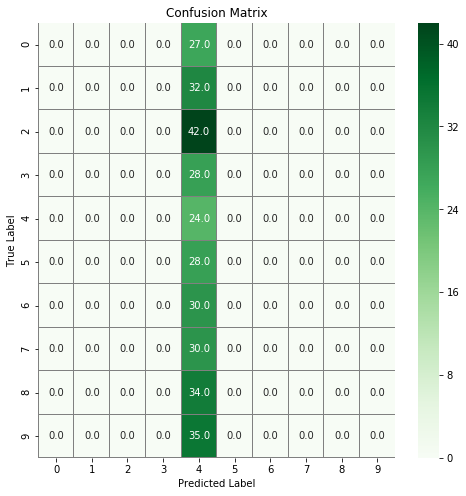

In [6]:
#Evaluate the Model with Confusion Matrix
import seaborn as sns
#Predict the values
Yprediction=learningModel.predict(Xtest)
#Convert the prediction 
YpredictionClasses=np.argmax(Yprediction,axis=1)
#Convert the true predictions
Ytrue=np.argmax(Ytest,axis=1)
#Confusion Matrix
confusionMatrix=confusion_matrix(Ytrue,YpredictionClasses)
#Show the results
ref, ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusionMatrix,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt=".1f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()